In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
from keras.models import Sequential 
from keras.layers import Dense , Activation , Flatten , Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [4]:
model = Sequential()

model.add(Conv2D(200 , (3,3) , input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(100 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.6756 - accuracy: 0.5697

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 79s 2s/step - loss: 0.6756 - accuracy: 0.5697 - val_loss: 0.6620 - val_accuracy: 0.5685
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.4917 - accuracy: 0.7697

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 51s 2s/step - loss: 0.4917 - accuracy: 0.7697 - val_loss: 0.3763 - val_accuracy: 0.8508
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.3373 - accuracy: 0.8576

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 50s 2s/step - loss: 0.3373 - accuracy: 0.8576 - val_loss: 0.3179 - val_accuracy: 0.8750
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.2173 - accuracy: 0.9192

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 49s 2s/step - loss: 0.2173 - accuracy: 0.9192 - val_loss: 0.2423 - val_accuracy: 0.9073
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.1547 - accuracy: 0.9444

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


31/31 [==============================] - 49s 2s/step - loss: 0.1547 - accuracy: 0.9444 - val_loss: 0.2324 - val_accuracy: 0.9153
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9667

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


31/31 [==============================] - 50s 2s/step - loss: 0.1087 - accuracy: 0.9667 - val_loss: 0.1984 - val_accuracy: 0.9194
Epoch 7/20
31/31 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9616

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


31/31 [==============================] - 50s 2s/step - loss: 0.1056 - accuracy: 0.9616 - val_loss: 0.1947 - val_accuracy: 0.9153
Epoch 8/20
31/31 [==============================] - 48s 2s/step - loss: 0.0799 - accuracy: 0.9758 - val_loss: 0.2989 - val_accuracy: 0.9073
Epoch 9/20
31/31 [==============================] - 48s 2s/step - loss: 0.0604 - accuracy: 0.9778 - val_loss: 0.2187 - val_accuracy: 0.9113
Epoch 10/20
31/31 [==============================] - 48s 2s/step - loss: 0.0315 - accuracy: 0.9929 - val_loss: 0.2465 - val_accuracy: 0.9234
Epoch 11/20
31/31 [==============================] - 48s 2s/step - loss: 0.0267 - accuracy: 0.9929 - val_loss: 0.2265 - val_accuracy: 0.9274
Epoch 12/20
31/31 [==============================] - 48s 2s/step - loss: 0.0302 - accuracy: 0.9919 - val_loss: 0.1992 - val_accuracy: 0.9274
Epoch 13/20
31/31 [==============================] - 49s 2s/step - loss: 0.0260 - accuracy: 0.9929 - val_loss: 0.2573 - val_accuracy: 0.9315
Epoch 14/20
31/31 [========

INFO:tensorflow:Assets written to: model-017.model\assets


INFO:tensorflow:Assets written to: model-017.model\assets


31/31 [==============================] - 49s 2s/step - loss: 0.1047 - accuracy: 0.9576 - val_loss: 0.1728 - val_accuracy: 0.9395
Epoch 18/20
31/31 [==============================] - 48s 2s/step - loss: 0.0326 - accuracy: 0.9879 - val_loss: 0.2499 - val_accuracy: 0.9315
Epoch 19/20
31/31 [==============================] - 48s 2s/step - loss: 0.0192 - accuracy: 0.9899 - val_loss: 0.1998 - val_accuracy: 0.9395
Epoch 20/20
31/31 [==============================] - 48s 2s/step - loss: 0.0120 - accuracy: 0.9970 - val_loss: 0.2606 - val_accuracy: 0.9315


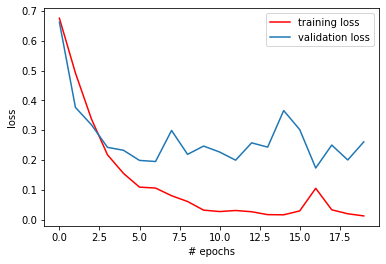

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

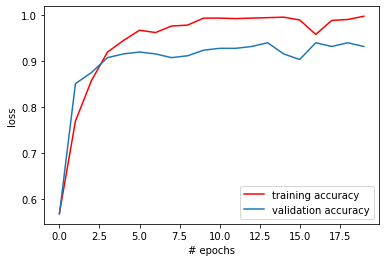

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 323ms/step - loss: 0.3665 - accuracy: 0.9275
[0.3665415644645691, 0.9275362491607666]
